# Green Screen Problem

In [118]:
# importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Forground Image Shape : (906, 1710, 3)
Background Image Shape : (906, 1710, 3)


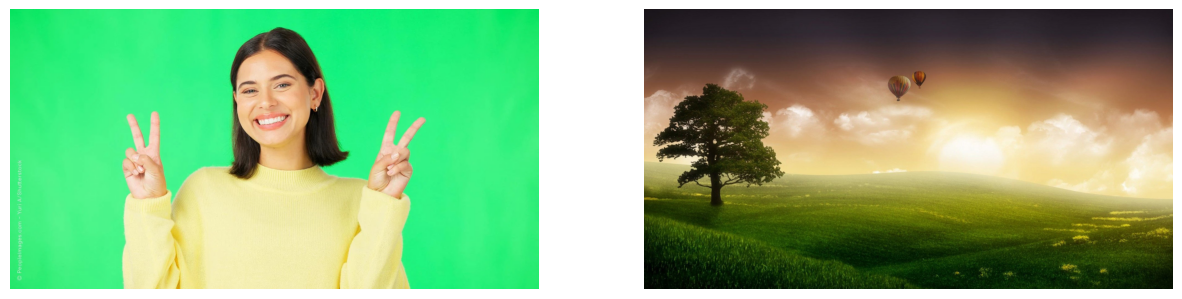

In [119]:
# reading the foreground and background images
fgimage = cv.imread(r"D:\Git\Image-Processing\Images\green_screen_girl.jpg")
bgimage = cv.imread(r"D:\Git\Image-Processing\Images\background_for_green_screen.jpg")

# resizing the background image
bgimage = cv.resize(bgimage, (fgimage.shape[1], fgimage.shape[0]))

# changing their color spaces from bgr to rgb
fgimage_rgb = cv.cvtColor(fgimage, cv.COLOR_BGR2RGB)
bgimage_rgb = cv.cvtColor(bgimage, cv.COLOR_BGR2RGB)

# getting the shapes of the foreground and background images
print("Forground Image Shape :", fgimage.shape)
print("Background Image Shape :", bgimage.shape)

# displaying the two images
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(fgimage_rgb)
ax[0].axis("off")
ax[1].imshow(bgimage_rgb)
ax[1].axis("off")
plt.show()

### Using a general method

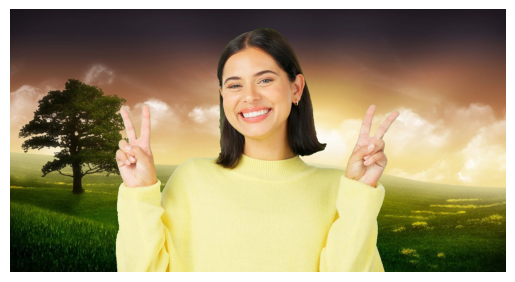

In [120]:
# height and width of foreground and background images
y1, x1 = fgimage_rgb.shape[:-1]
y2, x2 = bgimage_rgb.shape[:-1]

# creating a new image for the combination
new_image = fgimage_rgb.copy()

# replacing the background image for the green screen pixels of the foreground image
for i in range(x1):
    for j in range(y1):
        if (fgimage_rgb[j, i][1] > fgimage_rgb[j, i][0] + 20 and fgimage_rgb[j, i][1] > fgimage_rgb[j, i][2] + 20):
            new_image[j, i] = bgimage_rgb[j, i]

# displaying the new combined image
plt.imshow(new_image)
plt.axis("off")
plt.show()

### Using a mask

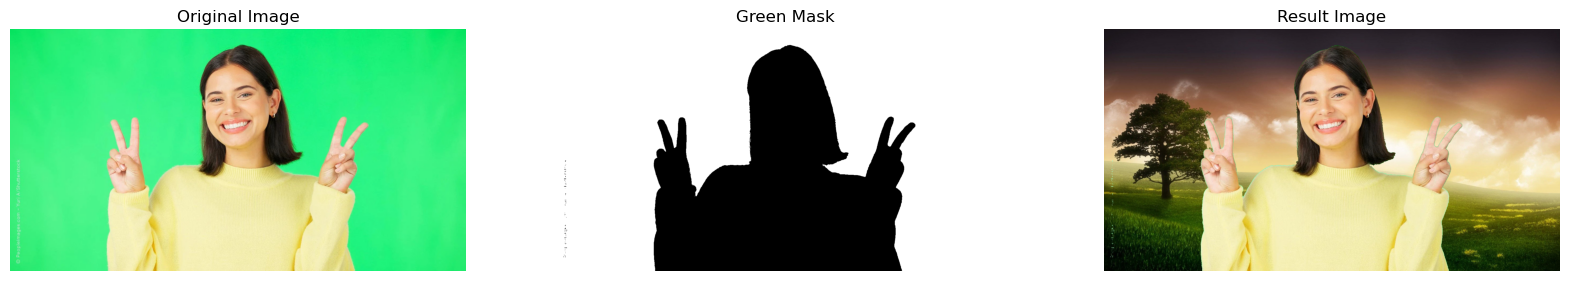

In [121]:
# Resize background to match the foreground dimensions
bgimage = cv.resize(bgimage, (fgimage.shape[1], fgimage.shape[0]))

# Convert the foreground image to HSV
hsv_image = cv.cvtColor(fgimage, cv.COLOR_BGR2HSV)

# Define the range for the green color in HSV
lower_green = np.array([35, 100, 100])
upper_green = np.array([85, 255, 255])

# Create a mask for the green color
green_mask = cv.inRange(hsv_image, lower_green, upper_green)

# Invert the mask to get the foreground
fg_mask = cv.bitwise_not(green_mask)

# Extract the foreground using the inverted mask
fgimage_extracted = cv.bitwise_and(fgimage, fgimage, mask=fg_mask)

# Extract the background region where the foreground will be placed
bgimage_masked = cv.bitwise_and(bgimage, bgimage, mask=green_mask)

# Combine the foreground and background
combined_image = cv.add(bgimage_masked, fgimage_extracted)

# displaying original, mask and result images
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(cv.cvtColor(fgimage, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(green_mask, cmap='gray')
ax[1].set_title('Green Mask')
ax[1].axis('off')
ax[2].imshow(cv.cvtColor(combined_image, cv.COLOR_BGR2RGB))
ax[2].set_title('Result Image')
ax[2].axis('off')
plt.show()

### Comparing two methods

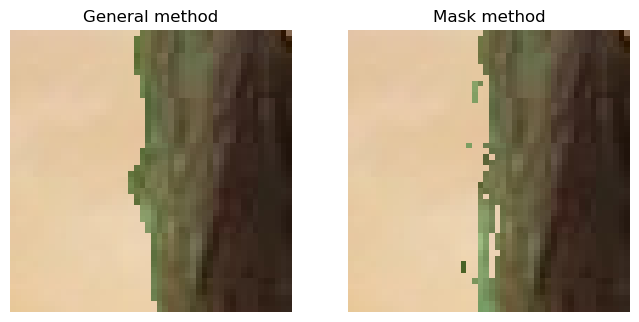

In [122]:
# converting the colorspaces
new_image_bgr = cv.cvtColor(new_image, cv.COLOR_RGB2BGR)
combined_image_rgb = cv.cvtColor(combined_image, cv.COLOR_BGR2RGB)

# displaying the images of two methods
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(new_image[380:430, 700:750])
ax[0].set_title("General method")
ax[0].axis("off")
ax[1].imshow(combined_image_rgb[380:430, 700:750])
ax[1].set_title("Mask method")
ax[1].axis("off")
plt.show()